#1. Introduction

We shall implement a multichanneled Deep-CNN for automatic diagnosis of COVID-19 from respiratory sounds like a voice, dry cough, and breath. A simpler version of the paper --

*Automatic diagnosis of COVID-19 disease
using deep convolutional neural network with
multi-feature channel from respiratory sound data:
Cough, voice, and breath* by
**Kranthi Kumar Lella, Alphonse Pja**



## 1.1 Loading the Dataset

In [ ]:
## Run this cell only if you dont have noisereduce library installed in your environment
#!pip install noisereduce

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
import librosa
import librosa.display
import IPython
from scipy.io import wavfile
import io
%matplotlib inline

In [ ]:
listOfFileNames = os.listdir('/content/drive/MyDrive/covid/trial_covid')
for i in listOfFileNames:
  print(f'{i}')

--U7joUcTCo_ 0.000_ 10.000.wav
-5dCv5_nvU8_ 200.000_ 210.000.wav
-Mdd8ysxJ5c_ 10.000_ 20.000.wav
-zeXIY8V1-E_ 30.000_ 40.000.wav
1UDFq2InljM_ 10.000_ 20.000.wav
-gvLnl1smfs_ 90.000_ 100.000.wav
0AWF9zOT8YY_ 150.000_ 160.000.wav
-o2vmOibWF4_ 310.000_ 320.000.wav
-THYRau6Prs_ 220.000_ 230.000.wav
2B_QV_5R4Zo_ 10.000_ 20.000.wav
0QOYirw4e3I_ 270.000_ 280.000.wav
1a1Dx52izTo_ 0.000_ 10.000.wav
1e3_ucOz0Ik_ 20.000_ 30.000.wav
2Bx5e9vwLGk_ 60.000_ 70.000.wav
1Xmw9VUzvLY_ 150.000_ 160.000.wav
2YF-ValJNas_ 0.000_ 5.000.wav
0qCvekeAHkc_ 210.000_ 220.000.wav
-szeMToBrRE_ 60.000_ 70.000.wav
0v8MGxNetjg_ 10.000_ 20.000.wav
2R3J8pH6E6s_ 20.000_ 30.000.wav
1MSYO4wgiag_ 120.000_ 130.000.wav
-ej81N6Aqo4_ 0.000_ 8.000.wav
-yJtuj9EuMg_ 190.000_ 200.000.wav
-OanE09iAA4_ 0.000_ 10.000.wav
1_oZWCKCGqA_ 10.000_ 20.000.wav
2Ez4R0a1icc_ 40.000_ 50.000.wav
0Dh4NhF27jc_ 140.000_ 150.000.wav
0qktEoIX2Sk_ 40.000_ 50.000.wav
1j1duoxdxBg_ 70.000_ 80.000.wav
0VaWzVLOWvE_ 120.000_ 130.000.wav
2hbytlgqDx4_ 140.000_ 15

In [ ]:
# get the cough dataset:
cd = pd.read_csv('/content/drive/MyDrive/covid/cough_trial_extended.csv')

# Lets get rid of duplicate values in the very first place if there are any
cd = cd.drop_duplicates()

# Display the dataset
cd

,file_properties,class
0,0v8MGxNetjg_ 10.000_ 20.000.wav,not_covid
1,1j1duoxdxBg_ 70.000_ 80.000.wav,not_covid
2,1MSYO4wgiag_ 120.000_ 130.000.wav,not_covid
3,1PajbAKd8Kg_ 0.000_ 10.000.wav,not_covid
4,cov1.wav,covid
...,...,...
165,-bZrDCS8KAg_ 70.000_ 80.000.wav,not_covid
166,-ej81N6Aqo4_ 0.000_ 8.000.wav,not_covid
167,-gvLnl1smfs_ 90.000_ 100.000.wav,not_covid
168,-hu5q-Nn4BM_ 70.000_ 80.000.wav,not_covid


In [ ]:
# lets ensure whether the csv and our dataset are the same or not
for i in cd.file_properties.values:
  if i not in listOfFileNames:
    print(i)

# Running this cell should result in a blank ideally

## 1.2 Exploring the Dataset

In [ ]:
files = cd.file_properties.values
files

array(['0v8MGxNetjg_ 10.000_ 20.000.wav',
       '1j1duoxdxBg_ 70.000_ 80.000.wav',
       '1MSYO4wgiag_ 120.000_ 130.000.wav',
       '1PajbAKd8Kg_ 0.000_ 10.000.wav', 'cov1.wav', 'cov2.wav',
       'cough-shallow-3CwioNQVDBQ6CttLyFVRJpMpVHk2.wav',
       'pos-0421-084-cough-m-50.wav',
       'cough-heavy-6T43bddKoKfG7MwnJWvrPZSsyrc2.wav',
       'cough-heavy-hNAGUEhL2Nh7V89at3yFEjQYo6c2.wav',
       'cough-heavy-hte8VptUoGVFEqvHpbh5brgfcNP2.wav',
       'cough-shallow-QjBZv868nydJzk0ZzwgKDHSG6Q82.wav',
       'pos-0421-092-cough-m-53.wav', 'pos-0422-096-cough-m-31.wav',
       'pos-0421-094-cough-m-51.wav',
       'cough-shallow-hNAGUEhL2Nh7V89at3yFEjQYo6c2.wav',
       'pos-0421-086-cough-m-65.wav', 'pos-0421-087-cough-f-40.wav',
       'cough-heavy-3CwioNQVDBQ6CttLyFVRJpMpVHk2.wav',
       'cough-shallow-6T43bddKoKfG7MwnJWvrPZSsyrc2.wav',
       'cough-heavy-QjBZv868nydJzk0ZzwgKDHSG6Q82.wav',
       'cough-shallow-hte8VptUoGVFEqvHpbh5brgfcNP2.wav',
       'pos-0421-093-cough-f-24.w

In [ ]:
# let us delete the "cough-heavy-3CwioNQVDBQ6CttLyFVRJpMpVHk2.wav"
# sample as it is heavily distorted
cd = cd.drop(18)

In [ ]:
cd.head(20)

,file_properties,class
0,0v8MGxNetjg_ 10.000_ 20.000.wav,not_covid
1,1j1duoxdxBg_ 70.000_ 80.000.wav,not_covid
2,1MSYO4wgiag_ 120.000_ 130.000.wav,not_covid
3,1PajbAKd8Kg_ 0.000_ 10.000.wav,not_covid
4,cov1.wav,covid
5,cov2.wav,covid
6,cough-shallow-3CwioNQVDBQ6CttLyFVRJpMpVHk2.wav,covid
7,pos-0421-084-cough-m-50.wav,covid
8,cough-heavy-6T43bddKoKfG7MwnJWvrPZSsyrc2.wav,covid
9,cough-heavy-hNAGUEhL2Nh7V89at3yFEjQYo6c2.wav,covid


In [ ]:
cd['class'].value_counts()

not_covid    147
covid         18
Name: class, dtype: int64

Out of the entire dataset, we have only 18 cases of of covid while the rest are of not_covid

#2. Data preprocessing


##2.1 Checking out sample sounds

In [ ]:
## Creating a helper function to plot a few signals at random
def plot_signals(filename):
  dir = '/content/drive/MyDrive/covid/trial_covid/'
  signal,sr = librosa.load(dir + filename,sr=22050)
  librosa.display.waveplot(signal,sr=sr)

In [ ]:
dir = '/content/drive/MyDrive/covid/trial_covid/'
import IPython
IPython.display.Audio(dir+files[19]) 


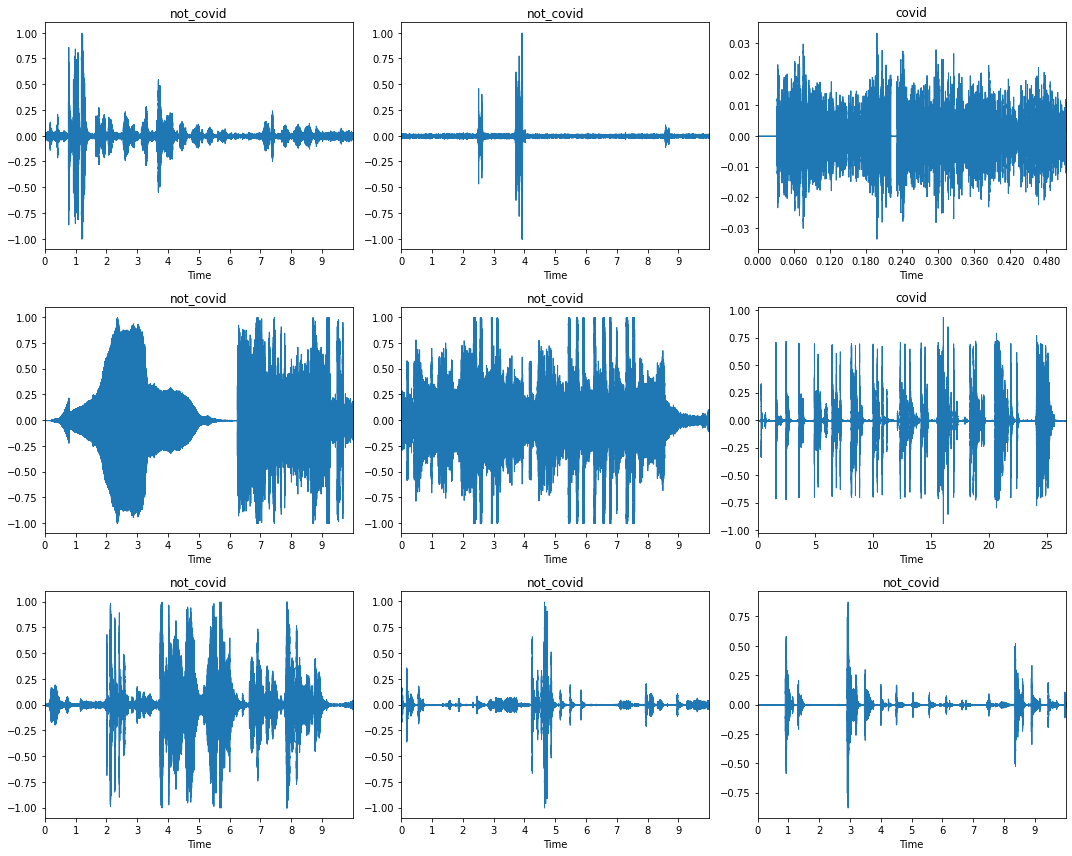

In [ ]:
# Check out a few sample signals:
plt.figure(figsize = (15,12))
for i in range(9):
  plt.subplot(3,3,i+1)
  k = np.random.randint(166)
  plot_signals(files[k])
  plt.title(f"{cd['class'].values[k]}")

plt.tight_layout()

## 2.2 De-noisify the Sound Signals

We shall use stationary noise reduction in this case so that we don't end up changing data properties which would be necessary in further anaylsis.

In [ ]:
path_dir = '/content/drive/MyDrive/covid/trial_covid/'

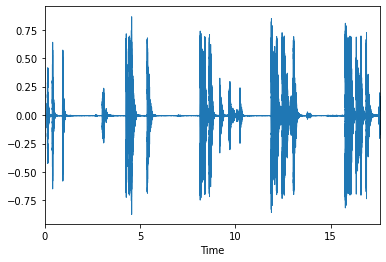

In [ ]:
signal,sr = librosa.load(path_dir + files[17],sr=22050)
librosa.display.waveplot(signal,sr=sr)

In [ ]:
def denoise_signal(signal):
  '''
  Functions takes in an argument signal and returns it after cleaning it uses
  fast fourier transforms and conjugate fast fourier transformations
  '''
  n = 220500
  fhat = np.fft.fft(signal,n = n)
  PSD = fhat * np.conj(fhat)
  indices = PSD>100
  fhat = indices * fhat
  ffilt = np.fft.ifft(fhat)
  mag = np.abs(ffilt)
  return mag

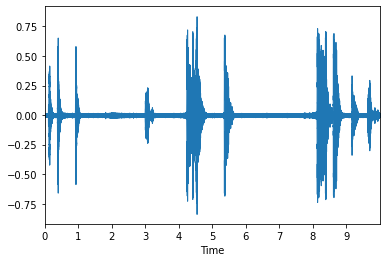

In [ ]:
# plotting a filtered signal
denoised = denoise_signal(signal)
librosa.display.waveplot(denoised,sr=sr)

## 2.3 Log-Mel spectrum

In [ ]:
def plot_mel(filename, dir = '/content/drive/MyDrive/covid/trial_covid/'):
  samples, sr = librosa.load(dir+filename) #sr= sampling rate

  #Denoise samples
  samples = denoise_signal(samples)

  #Generate the mel spectogram
  audioSpec = librosa.feature.melspectrogram(samples)

  #Convert to db scale
  audio_dB = librosa.power_to_db(audioSpec,ref=np.max)

  # Plot it
  librosa.display.specshow(audio_dB,sr=sr)

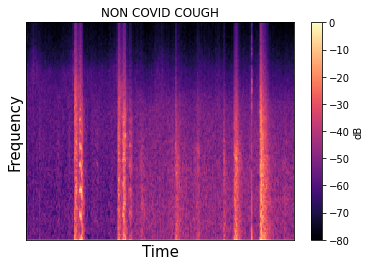

In [ ]:
# Compare a healthy voice with covid one:
plot_mel(files[55])
plt.title('NON COVID COUGH')
plt.colorbar(label= 'dB')
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()


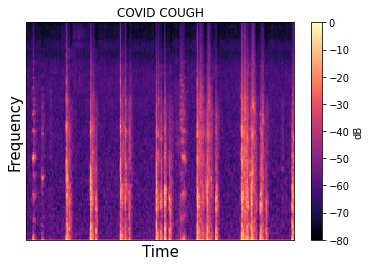

In [ ]:
plot_mel(files[12])
plt.title('COVID COUGH')
plt.colorbar(label= 'dB')
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

# 3. Creating Datasets

Before running a model, we need to set up our datasets

In [ ]:
import cv2 as cv

path = '/content/drive/MyDrive/covid/dataset/'
dir = '/content/drive/MyDrive/covid/trial_covid/'

X , y = ([],[])

for title in cd.file_properties.values:
  if list(cd.loc[cd.file_properties ==title]['class'])[0] == 'not_covid':
    label = 0
    y.append(label)
  else:
    label = 1
    y.append(label)

  # Generate Signals
  samples, sr = librosa.load(dir+title)
  samples = denoise_signal(samples)
  audioSpec = librosa.feature.melspectrogram(samples)
  audio_dB = librosa.power_to_db(audioSpec,ref=np.max)

  # Plot it
  fig,ax = plt.subplots(1)
  fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
  ax.axis('tight')
  ax.axis('off')
  img = librosa.display.specshow(audio_dB)
  img_path = path + title[:-3] + 'png'
  fig.savefig(img_path)
  plt.close(fig)

  image = cv.imread(img_path)
  image = image * 1./255

  X.append(image)

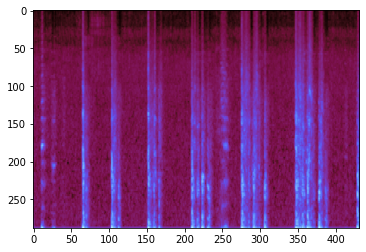

In [ ]:
plt.imshow(X[12])

Text(0.5, 1.0, 'NORMAL COUGH; y = 0')

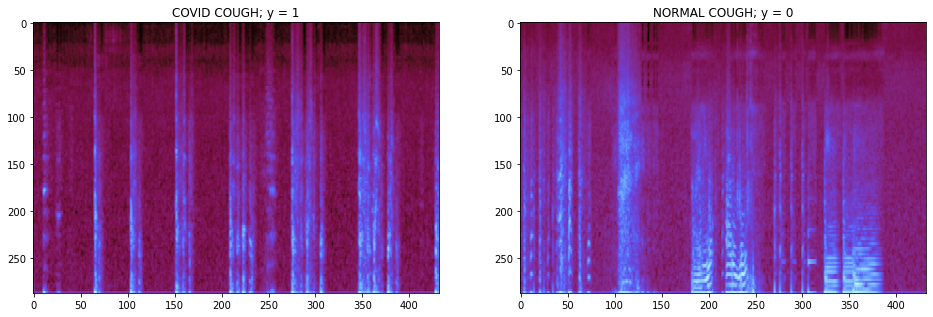

In [ ]:
# Let us check out a bunch of images with their labels now:
plt.figure(figsize=(16,12))

plt.subplot(1,2,1)
plt.imshow(X[12])
plt.title(f'COVID COUGH; y = {y[12]}')

plt.subplot(1,2,2)
plt.imshow(X[36])
plt.title(f'NORMAL COUGH; y = {y[56]}')

The differences are already visible, we can start with splitting the dataset now

In [ ]:
y = np.array(y)
X = np.array(X)

In [ ]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Since our model has very small numbers of true labels, only standing at 18, I shall reintroduce them sparsely all over the dataset so that our model can train efficiently

In [ ]:
y = np.concatenate((y ,y[4:22][::-1]))
x = np.concatenate((X, X[4:22][::-1]))

In [ ]:
x[15].shape

(288, 432, 3)

In [ ]:
np.unique(y, return_counts = True)

(array([0, 1]), array([147,  36]))

In [ ]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(x,y,shuffle = True, test_size = 0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(146, 37, 146, 37)

In [ ]:
y_test

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

# 5. Creating a model -

In [ ]:
# Create a CNN model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model_1 = tf.keras.models.Sequential([
  Conv2D(filters=24, 
         kernel_size=(5,5),
         activation="relu", 
         input_shape=(288, 432, 3)),

  MaxPool2D(pool_size=(2,4),
            padding="valid"),  

  Conv2D(48,5, activation="relu"),
  Conv2D(48,5, activation="relu"),

  MaxPool2D(pool_size=(2,4),
            padding="valid"),

  Conv2D(48,5, activation="relu"),

  Dropout(0.5),

  MaxPool2D(pool_size=(2,4),
            padding="valid"),
  Dropout(0.5),

  Flatten(),
  Dense(8, activation = 'relu'),
  
  Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 284, 428, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 142, 107, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 138, 103, 48)      28848     
                                                                 
 conv2d_2 (Conv2D)           (None, 134, 99, 48)       57648     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 67, 24, 48)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 20, 48)        5

In [ ]:
history_1 = model_1.fit(X_train,y_train,
                        epochs= 5,
                        steps_per_epoch=len(X_train))

Epoch 1/5
146/146 [==============================] - 16s 24ms/step - loss: 0.5371 - accuracy: 0.7808
Epoch 2/5
146/146 [==============================] - 3s 18ms/step - loss: 0.5009 - accuracy: 0.7877
Epoch 3/5
146/146 [==============================] - 3s 18ms/step - loss: 0.4591 - accuracy: 0.8151
Epoch 4/5
146/146 [==============================] - 3s 18ms/step - loss: 0.3968 - accuracy: 0.8425
Epoch 5/5
146/146 [==============================] - 3s 18ms/step - loss: 0.3795 - accuracy: 0.8425


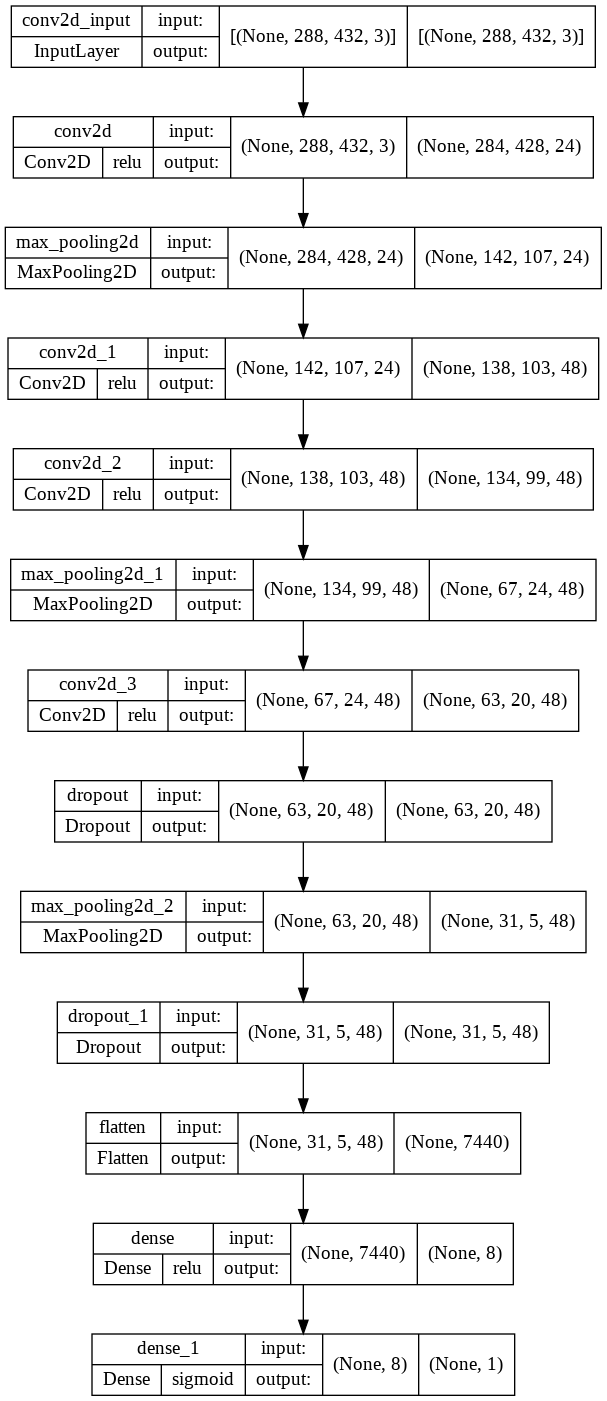

In [ ]:
# plot the model
tf.keras.utils.plot_model(
    model_1,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True
)

In [ ]:
y_preds = model_1.predict(X_test)
model_1.evaluate(X_train,y_train)

5/5 [==============================] - 2s 323ms/step - loss: 0.3734 - accuracy: 0.8425


[0.37338605523109436, 0.8424657583236694]

In [ ]:
model_1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 27ms/step - loss: 0.4103 - accuracy: 0.8649


[0.41034555435180664, 0.8648648858070374]

So we have achieved 91% accuracy on train dataset and 79% on test dataset. Lets check out the training curve

Text(0, 0.5, 'Loss/Accuracy')

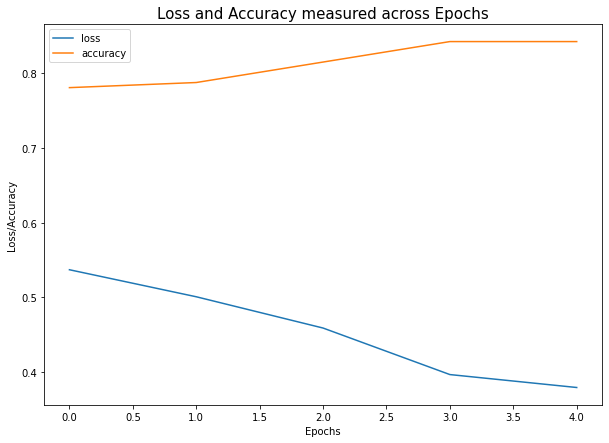

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));
plt.xlabel('Epochs')
plt.title("Loss and Accuracy measured across Epochs", fontsize = 15)
plt.ylabel('Loss/Accuracy')


Our model has done well, it has not overfit but it would appear that due to a lack of data it couldn't fit wholly either.

In [ ]:
from sklearn.metrics import classification_report
y_preds = model_1.predict(X_test)
print(classification_report(y_preds.round(), y_test ,zero_division = 1))

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93        35
         1.0       0.00      0.00      0.00         2

    accuracy                           0.86        37
   macro avg       0.47      0.46      0.46        37
weighted avg       0.89      0.86      0.88        37

